Visualization of Data

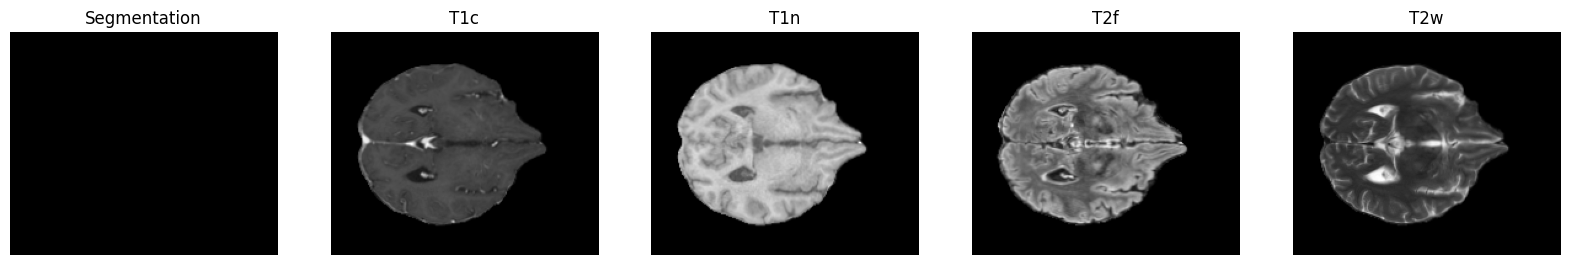

In [1]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import os

# Load the NIfTI files
data_path = "data/BraTS-GLI-00005-100"
files = [
    f'{data_path}-seg.nii.gz',
    f'{data_path}-t1c.nii.gz',
    f'{data_path}-t1n.nii.gz',
    f'{data_path}-t2f.nii.gz',
    f'{data_path}-t2w.nii.gz'
]

# Function to load a NIfTI file and return its data
def load_nifti(file_path):
    img = nib.load(file_path)
    data = img.get_fdata()
    return data

# Load all files
images = [load_nifti(os.path.join(data_path, file)) for file in files]
titles = ['Segmentation', 'T1c', 'T1n', 'T2f', 'T2w']

# Plot slices
fig, axes = plt.subplots(1, len(images), figsize=(20, 10))

# Select a slice to display (e.g., the middle slice)
slice_idx = images[0].shape[2] // 2

for i, (image, title) in enumerate(zip(images, titles)):
    axes[i].imshow(image[:, :, slice_idx], cmap='gray')
    axes[i].set_title(title)
    axes[i].axis('off')

plt.show()


Mesh Generation

In [44]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import distance_transform_edt
import os
import imageio
from skimage import measure
import trimesh

# Load the NIfTI files
# ds_path = 
data_path = "data\\BraTS-GLI-00005-100"
labels = ['seg', 't1c', 't1n', 't2f', 't2w']

# Function to load a NIfTI file and return its data
def load_nifti(file_path):
    img = nib.load(file_path)
    data = img.get_fdata()
    return data
for label in labels:   
    # Load the NIfTI file (e.g., the segmentation file)
    file_path = f"{data_path}\\{data_path}-{label}.nii.gz"

    def load_nifti(file_path):
        img = nib.load(file_path)
        data = img.get_fdata()
        return data

    # Load the segmentation data
    data = load_nifti(file_path)

    # Create a binary volume from the segmentation data
    # binary_volume = (segmentation_data > 0).astype(np.uint8)
    # print(binary_volume.shape)
    c = 0 
    slices = []
    for slice in data:
        if slice.sum()>0:
            c+=1
            slices.append(slice)
            # plt.imshow(i>0.8,  cmap='gray')
            # plt.show()


    # Stack the slices to create a 3D volume
    volume = np.stack(slices, axis=-1)

    # Ensure the volume is binary
    binary_volume = volume > 0

    # Apply the Marching Cubes algorithm
    verts, faces, normals, values = measure.marching_cubes(binary_volume, level=0.0001)

    # Create a Trimesh object
    mesh = trimesh.Trimesh(vertices=verts, faces=faces, vertex_normals=normals)

    # Export the mesh to an OBJ file
    mesh.export(f'output-{label}.obj')

    print(c)

41
133
133
133
133
